In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"..\datafiles\50_Startups.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


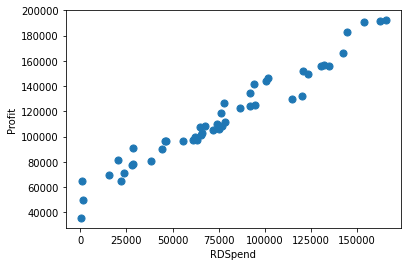

In [5]:
plt.scatter(df['RDSpend'], df['Profit'], s = 50)
plt.xlabel("RDSpend")
plt.ylabel("Profit")
plt.show()

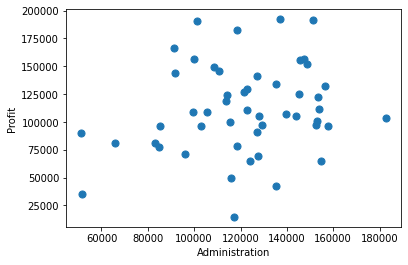

In [6]:
plt.scatter(df['Administration'], df['Profit'], s = 50)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

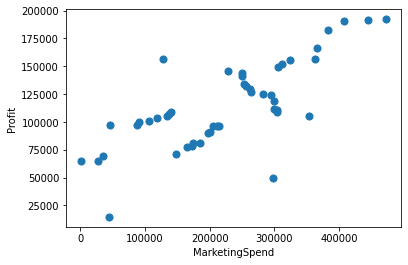

In [7]:
plt.scatter(df['MarketingSpend'], df['Profit'], s = 50)
plt.xlabel("MarketingSpend")
plt.ylabel("Profit")
plt.show()

In [9]:
df.corr()['Profit']

RDSpend           0.977401
Administration    0.200717
MarketingSpend    0.747434
Profit            1.000000
Name: Profit, dtype: float64

In [10]:
df.head(5)

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [12]:
df.isna().sum()

RDSpend           2
Administration    0
MarketingSpend    3
State             0
Profit            0
dtype: int64

In [19]:
rd_withoutna = df['RDSpend'].dropna()

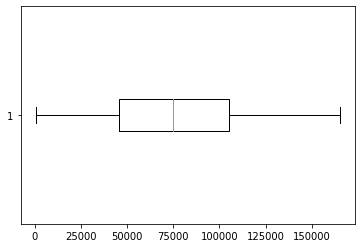

In [21]:
plt.boxplot(rd_withoutna, vert=False);

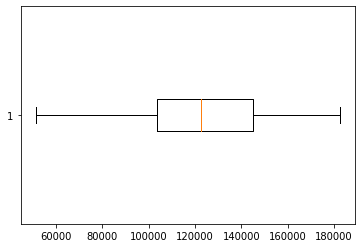

In [22]:
plt.boxplot(df['Administration'], vert=False);

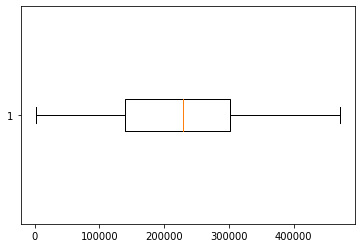

In [23]:
ms_withoutna = df['MarketingSpend'].dropna()
plt.boxplot(ms_withoutna, vert=False);

## Replace NA values with mean

In [24]:

df['RDSpend'].fillna(value=df['RDSpend'].mean(),inplace=True)

df['MarketingSpend'].fillna(value=df['MarketingSpend'].mean(), inplace=True)


## Split Data into X and y

In [25]:
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(50, 4) (50,)


## Deal with strings
## Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [28]:
le = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])
# fitting the label and transforming also and assigning it back to original X data
# converted string data into numbers

In [29]:
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 224494.78489361706, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 1

In [30]:
le.inverse_transform([1])

array(['Florida'], dtype=object)

In [31]:
le.inverse_transform([2])

array(['New York'], dtype=object)

In [32]:
le.inverse_transform([0])

array(['California'], dtype=object)

## One Hot Encoding - Use it only for nominal data

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [36]:
ct = ColumnTransformer(
        [('ohe', OneHotEncoder(),[3])],
        remainder = 'passthrough'
        )
# list of tuples
#    List of (name, transformer, column(s)) tuples specifying the
#    transformer objects to be applied to subsets of the data.

In [37]:
X = ct.fit_transform(X)

In [38]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [39]:
X.shape

(50, 6)

## Split Data into training and testing

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# random_State is a seed value
# you can give any seed value - doesnt matter
# To replicate the results, use the same seed value

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(40, 6) (10, 6) (40,) (10,)


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
model.coef_

array([-3.84830487e+03,  1.01528523e+03,  2.83301964e+03,  6.45209703e-01,
        1.00425490e-01,  8.15150660e-02])

In [46]:
model.intercept_

30783.446209464673

## Validate the model

In [49]:
model.score(X_test, y_test)

0.8674188316529297

r2_score approx accuracy
r2_score explains the variation in the data


In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y_test,y_pred)
#coefficient of determination) regression score function.

0.8674188316529297

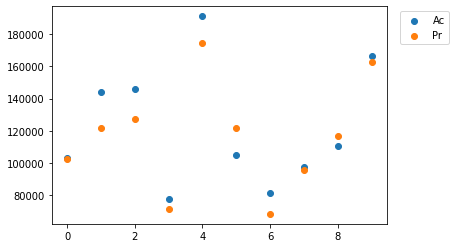

In [57]:
plt.scatter(range(len(y_test)), y_test, label = 'Ac')
plt.scatter(range(len(y_pred)), y_pred, label = 'Pr')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()